<b>Principal Component Analysis</b>
    This Principal component analysis is one of the techniques used in Data preprocessing for "Dimensionality Reduction". Suppose our dataset has 100 features and more features means our ML model will have tough time getting trained on data and that will mean Less ACCURACY. Having less number of features will help build a robust model. So PCA helps in reducing the number of features.
Steps in PCA -

    + Converting the data to Standard normal form.i.e. Stndardisation ( where mean=0, standard deviation=1). Use (x-mean)/s.d. 
    + calculate covariance matrix for all features to see which features are positively and negatively correlated.
    + calculate Eigen vectors and Eigen values.
    + arrange in descending order all the eigen vectors and values.
    + choose topmost eigen vectors as the principal components.

Now since the principal components are chosen, you can use any ML model like linear regression or Decision tree or KNN for prediction of target variable.
Here in below code, we are simply using available tools to do PCA on Cancer data available with Sklearn and then applying logistic regression to accurately predict the cancer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
## cancer data is of dictionary type. lets see its keys
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
##since this data is dict type, we will create a data frame using data and feature_names
dataframe = pd.DataFrame( cancer['data'],columns = cancer['feature_names'])
dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
##above data has 30 columns, we need to reduce it to 2 columns
## first we need to standardize it by using Standardscaler method from Sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataframe)
scaled_dataframe = scaler.transform(dataframe)

In [14]:
scaled_dataframe

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
scaled_dataframe.shape

(569, 30)

Since this data is standradized, now we have to use PCA from Sklearn.And Specify number of features we want to reduce data to.

In [16]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(scaled_dataframe)
reduced_dataframe = pca_model.transform(scaled_dataframe)

In [17]:
reduced_dataframe.shape

(569, 2)

In [18]:
reduced_dataframe    ## these 2 features are our dependent variable and cancer['target'] is our target variable

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Since PCA has reduced features from 30 to 2, we can now build any model on this data and predict target variable.

First , lets plot these 2 features of distribution of data

Text(0, 0.5, 'PCA2')

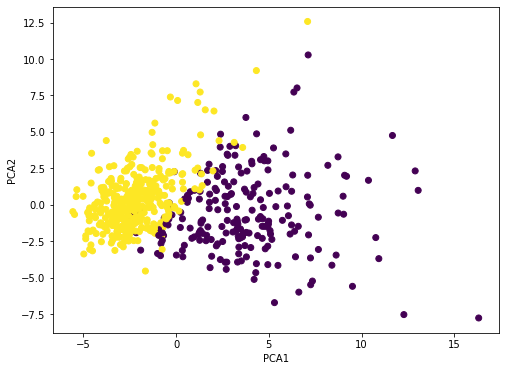

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_dataframe[:,0],reduced_dataframe[:,1],c = cancer['target'])
plt.xlabel("PCA1")
plt.ylabel("PCA2")

Since in above scatter plot, data can be clearly seggregated, we can use Linear Model to predict our target variable

In [22]:
from sklearn.model_selection import train_test_split

X_axis_data = reduced_dataframe
Y_axis_data = cancer['target']

#splitting the X_axis_data and Y_axis_data into test and training data set 
x_train,x_test,y_train,y_test = train_test_split(X_axis_data, Y_axis_data, test_size=0.2,random_state=0)

In [32]:
#building Linear regression model obj
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

y_target = logistic_model.predict(x_test)

In [34]:
##in case of logistic regression, we use Confusion matrix for comparing the predicted result with actual data
pred_results = pd.DataFrame({'y_actual': y_test,
                             'y_predicted': y_target})

In [43]:
pred_results

,y_actual,y_predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
109,0,0
110,1,1
111,0,0
112,0,0


To check the accuracy of Logistic regression, we compute <b> Confusion matrix </b>
+ One way is to use Crosstab feature from Pandas
+ Other is using Confusion matrix method from Sklearn

In [44]:
# method 1, using crosstab
cancer_crosstab =  pd.crosstab(pred_results.y_actual,pred_results.y_predicted)
cancer_crosstab

y_predicted,0,1
y_actual,,
0,45,2
1,6,61


In [45]:
#method2 , using method from Sklear
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_target)

In [41]:
cm

array([[45,  2],
       [ 6, 61]], dtype=int64)

Calculating Accuracy, Precision and Recall score 

+ ACCURACY = (TP+TN) / TOTAL
+ RECALL = TP / TP+FN
+ PRECISION = TP / TP+FP

In confusion matrix - 
                      TP = [0,0]
                      FP = [0,1]
                      FN = [1,0]
                      TN = [1,1]

In [47]:
accuracy_score = (45+61)/(45+2+6+61)
accuracy_score

0.9298245614035088

In [48]:
recall_score = 45/(45+6)
recall_score

0.8823529411764706

In [49]:
precision_score = 45/(45+2)
precision_score

0.9574468085106383